# ML class final project part2
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df(folder, ball_type,number):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    for i in folder_dir:
        if i==ball_type:
            print(i)
            j = os.listdir(folder+"/"+i)
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    dst = cv2.Canny(img, 50, 200, None, 3)
                    dst1 = cv2.Canny(img, 50, 200, None, 3)
                    lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    gray = cv2.medianBlur(gray, 5)
                    rows = gray.shape[0]
                    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                    param1=100, param2=30,
                                    minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(number)
                    if lines is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(len(lines))
                    if circles is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(circles.shape[1])
                    
                    my_list.extend(histogram_r)
                    my_list.extend(histogram_g)
                    my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

    
    print("creating df")
    cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 
              
    return df


def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        for k in range(len(j)):
            try:
                img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                
                # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                
                dst = cv2.Canny(img, 50, 200, None, 3)
                # dst1 = cv2.Canny(img, 50, 200, None, 3)
                # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                
                # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                # gray = cv2.medianBlur(gray, 5)
                # rows = gray.shape[0]
                # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                #                 param1=100, param2=30,
                #                 minRadius=10, maxRadius=100)
                
                my_list=[]
                my_list.append(folder+"/"+i+"/"+j[k])
                my_list.append(i)
                my_list.append(c)
                # if lines is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(len(lines))
                # if circles is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(circles.shape[1])
                
                # my_list.extend(histogram_r)
                # my_list.extend(histogram_g)
                # my_list.extend(histogram_b)
                # my_list.extend(img.flatten())
                my_list.extend(dst.flatten())

                big_list.append(my_list)
                count+=1
                
            except:
                print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    # for h in range(200*200*3):
    #     cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [17]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [18]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [19]:
# full_ball_edge_df.to_csv('edge.csv', index=False)

In [3]:
folder ="C:/Users/nechd/Downloads/ball_classification/test"
start_time = time.time()
full_test_df = create_df1(folder) 
end_time = time.time()
print("time taken: ",end_time - start_time)

american_football
baseball
basketball
billiard_ball
bowling_ball
cricket_ball
football
golf_ball
hockey_ball
hockey_puck
rugby_ball
shuttlecock
table_tennis_ball
tennis_ball
volleyball
creating df
created df
time taken:  413.9770224094391


In [ ]:
full_test_df.to_csv('final_test_data_edge.csv', index=False)

import the data with some/all features

In [36]:
edge = pd.read_csv('edge.csv')
del edge['path']
del edge['class_name']
ball_type = [0,2,9,11]
edge_4balls = edge.loc[edge['class_number'].isin(ball_type)]
edge_4balls.shape

(1543, 40001)

In [37]:
X = edge_4balls.drop(['class_number'], axis=1)
y = edge_4balls['class_number']

train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
pca1=PCA(n_components=0.9)
X_train5=pca1.fit_transform(X_train)
X_test5=pca1.transform(X_test)
y_train5 = y_train
y_test5 = y_test

print(X_train5.shape)
print(X_test5.shape)

(1080, 702)
(463, 702)


extra functions

In [40]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [55]:
# list to hold all final results
results=[]

model imports

In [42]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET WITH LINES AND CIRCLES 

#### SVM

In [64]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 52.480000000000004 %
squared_hinge l2 52.480000000000004 %
OutputCodeClassifier
hinge l2 42.980000000000004 %
squared_hinge l2 37.37 %
OneVsRestClassifier
hinge l2 52.480000000000004 %
squared_hinge l2 52.480000000000004 %


              precision    recall  f1-score   support

           0       0.46      0.39      0.43       112
           2       0.46      0.55      0.50       106
           9       0.50      0.52      0.51       106
          11       0.66      0.62      0.64       139

    accuracy                           0.52       463
   macro avg       0.52      0.52      0.52       463
weighted avg       0.53      0.52      0.52       463

52.480000000000004 %


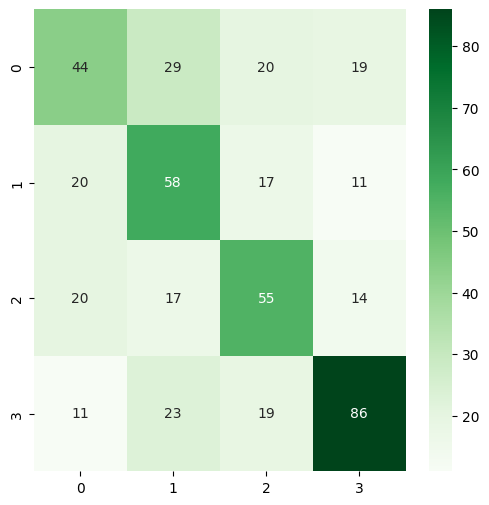

In [65]:
svm5 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train5, y_train5)
pred_svm5 = svm5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_svm5))
print(classification_report(y_test5, pred_svm5))
print(round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 0.9', 'SVM',round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100 ])

#### KNN

In [44]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train5,y_train5)
    pred_knn = neigh.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_knn])/len(y_test5),4)*100,"%")

1 44.92 %
2 40.6 %
3 38.66 %
4 34.99 %
5 33.910000000000004 %
6 34.13 %
7 33.910000000000004 %
8 33.26 %
9 33.910000000000004 %
10 31.97 %
11 30.020000000000003 %
12 31.319999999999997 %
13 33.26 %
14 32.4 %
15 30.89 %
16 31.1 %
17 30.45 %
18 30.45 %
19 30.240000000000002 %
20 28.939999999999998 %
21 29.59 %
22 29.37 %
23 28.939999999999998 %
24 28.08 %
25 27.650000000000002 %
26 28.51 %
27 27.650000000000002 %
28 28.08 %
29 27.650000000000002 %
30 28.29 %
31 28.08 %
32 28.08 %
33 27.860000000000003 %
34 28.29 %
35 28.08 %
36 28.08 %
37 28.08 %
38 27.860000000000003 %
39 27.650000000000002 %
40 26.779999999999998 %
41 26.35 %
42 27.21 %
43 26.779999999999998 %
44 26.779999999999998 %
45 27.0 %
46 26.779999999999998 %
47 25.919999999999998 %
48 26.35 %
49 26.13 %
50 26.57 %


              precision    recall  f1-score   support

           0       0.52      0.35      0.42       112
           2       0.36      0.18      0.24       106
           9       0.35      0.60      0.44       106
          11       0.56      0.62      0.59       139

    accuracy                           0.45       463
   macro avg       0.45      0.44      0.42       463
weighted avg       0.46      0.45      0.43       463

44.92 %


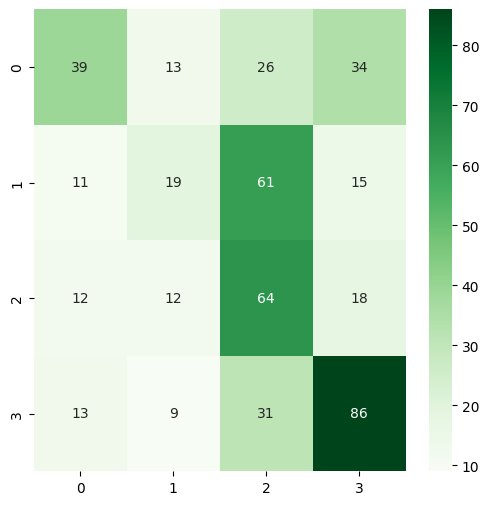

In [57]:
neigh5 = KNeighborsClassifier(n_neighbors=1)
neigh5.fit(X_train5,y_train5)
pred_knn5 = neigh5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_knn5))
print(classification_report(y_test5, pred_knn5))
print(round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 0.9', 'KNN',round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100 ])

#### Adaboost

In [45]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train5,y_train5)
    pred_ada = ada.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_ada])/len(y_test5),4)*100,"%")

50 38.23 %
100 38.879999999999995 %
150 39.739999999999995 %
200 40.6 %
250 41.68 %
300 40.17 %
350 42.33 %
400 41.25 %
450 41.04 %
500 41.25 %
550 42.33 %
600 42.55 %
650 42.55 %
700 42.55 %
750 41.04 %
800 43.41 %
850 42.33 %
900 42.76 %
950 42.33 %
1000 42.980000000000004 %
1050 42.76 %
1100 42.980000000000004 %
1150 42.76 %
1200 43.2 %
1250 43.41 %
1300 43.41 %
1350 43.84 %
1400 43.63 %
1450 43.84 %
1500 42.980000000000004 %
1550 42.980000000000004 %
1600 43.41 %
1650 44.92 %
1700 44.92 %
1750 43.2 %
1800 43.41 %
1850 44.06 %
1900 45.36 %
1950 44.92 %
2000 45.36 %


              precision    recall  f1-score   support

           0       0.35      0.42      0.38       112
           2       1.00      0.11      0.20       106
           9       0.41      0.58      0.48       106
          11       0.54      0.65      0.59       139

    accuracy                           0.45       463
   macro avg       0.57      0.44      0.41       463
weighted avg       0.57      0.45      0.42       463

45.36 %


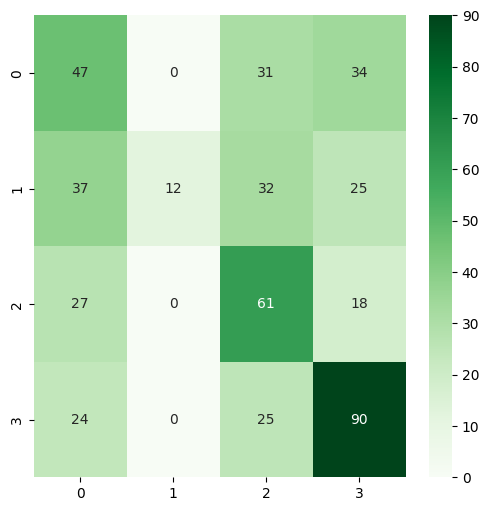

In [58]:
ada5 = AdaBoostClassifier(n_estimators=2000, algorithm="SAMME",random_state=0)
ada5.fit(X_train5,y_train5)
pred_ada5 = ada5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_ada5))
print(classification_report(y_test5, pred_ada5))
print(round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 0.9', 'Adaboost',round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100 ])

#### Random Forest

In [46]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train5,y_train5)
        pred_RF = RF.predict(X_test5)
        print(i,j,round(np.sum([y_test5==pred_RF])/len(y_test5),4)*100,"%")

40 2 44.92 %
40 3 45.14 %
40 4 45.36 %
60 2 46.44 %
60 3 46.22 %
60 4 45.57 %
80 2 45.36 %
80 3 45.57 %
80 4 45.36 %
100 2 45.79 %
100 3 45.79 %
100 4 46.22 %
120 2 46.22 %
120 3 48.16 %
120 4 45.79 %
140 2 46.87 %
140 3 46.22 %
140 4 47.52 %
160 2 46.0 %
160 3 47.08 %
160 4 48.6 %
180 2 47.73 %
180 3 47.08 %
180 4 47.73 %
200 2 46.22 %
200 3 47.08 %
200 4 47.949999999999996 %
220 2 46.650000000000006 %
220 3 46.87 %
220 4 47.73 %
240 2 46.22 %
240 3 47.52 %
240 4 47.3 %
260 2 47.08 %
260 3 47.52 %
260 4 46.87 %
280 2 46.650000000000006 %
280 3 47.3 %
280 4 47.08 %
300 2 47.949999999999996 %
300 3 47.08 %
300 4 47.52 %
320 2 47.73 %
320 3 47.73 %
320 4 47.949999999999996 %
340 2 47.3 %
340 3 47.08 %
340 4 47.73 %
360 2 47.08 %
360 3 47.08 %
360 4 48.16 %
380 2 47.52 %
380 3 47.08 %
380 4 48.38 %
400 2 47.3 %
400 3 47.949999999999996 %
400 4 48.16 %
420 2 47.52 %
420 3 47.3 %
420 4 47.73 %
440 2 47.08 %
440 3 48.16 %
440 4 47.52 %
460 2 47.08 %
460 3 47.73 %
460 4 47.73 %
480 2 47.3 %
4

              precision    recall  f1-score   support

           0       0.62      0.22      0.33       112
           2       1.00      0.16      0.28       106
           9       0.37      0.72      0.49       106
          11       0.52      0.76      0.62       139

    accuracy                           0.48       463
   macro avg       0.63      0.47      0.43       463
weighted avg       0.62      0.48      0.44       463

48.38 %


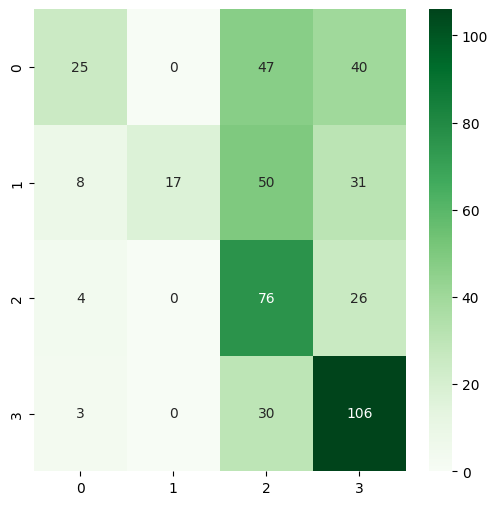

In [59]:
RF5 = RandomForestClassifier(n_estimators=380, max_depth=None,min_samples_split=4, random_state=0)
RF5.fit(X_train5,y_train5)
pred_RF5 = RF5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_RF5))
print(classification_report(y_test5, pred_RF5))
print(round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 0.9', 'Random Forest',round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100 ])

#### Logistic Regression

In [47]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train5,y_train5)
                pred_LR = LR.predict(X_test5)
                print(i,j,k,round(np.sum([y_test5==pred_LR])/len(y_test5),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 55.720000000000006 %
l1 liblinear 0.01 52.05 %
l1 liblinear 0.001 53.779999999999994 %
l1 saga 0.1 52.27 %
l1 saga 0.01 54.64 %
l1 saga 0.001 54.64 %
l2 lbfgs 0.1 49.68 %
l2 lbfgs 0.01 51.839999999999996 %
l2 lbfgs 0.001 51.190000000000005 %
l2 liblinear 0.1 52.7 %
l2 liblinear 0.01 53.559999999999995 %
l2 liblinear 0.001 54.21 %
l2 newton-cg 0.1 51.190000000000005 %
l2 newton-cg 0.01 51.190000000000005 %
l2 newton-cg 0.001 50.970000000000006 %
l2 sag 0.1 54.21 %
l2 sag 0.01 54.64 %
l2 sag 0.001 54.21 %
l2 saga 0.1 52.27 %
l2 saga 0.01 54.64 %
l2 saga 0.001 54.64 %


              precision    recall  f1-score   support

           0       0.50      0.48      0.49       112
           2       0.55      0.50      0.52       106
           9       0.53      0.56      0.54       106
          11       0.63      0.66      0.64       139

    accuracy                           0.56       463
   macro avg       0.55      0.55      0.55       463
weighted avg       0.56      0.56      0.56       463

55.720000000000006 %


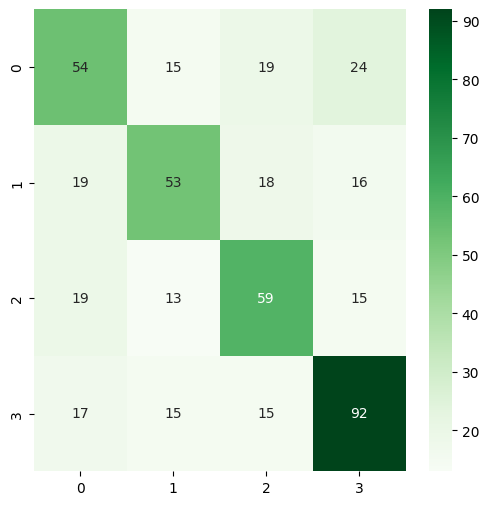

In [60]:
LR5 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state=0)
LR5.fit(X_train5,y_train5)
pred_LR5 = LR5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_LR5))
print(classification_report(y_test5, pred_LR5))
print(round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 0.9', 'Logistic Regression',round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100 ])

In [61]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [62]:
df

,df_type,classifier,accuracy
0,edges PCA 0.9,SVM,52.48
1,edges PCA 0.9,KNN,44.92
2,edges PCA 0.9,Adaboost,45.36
3,edges PCA 0.9,Random Forest,48.38
4,edges PCA 0.9,Logistic Regression,55.72


In [ ]:
import pickle
filenames = ['svm5.sav','knn5.sav','ada5.sav','RF5.sav','LR5.sav']
models= [svm5,neigh5,ada5,RF5,LR5]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))